# Import Required Libraries

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Obtaining the Dataset

In [31]:
loan=pd.read_csv("C:\\Users\\saran\\Desktop\\loan_approval_dataset.csv")

In [32]:
loan.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# Data PreProcessing

In [34]:
#conducting min-max scalar
from sklearn.preprocessing import MinMaxScaler

# Define numerical columns
numerical_cols = [' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
                  ' cibil_score', ' residential_assets_value', ' commercial_assets_value',
                  ' luxury_assets_value', ' bank_asset_value']

# Select numerical data
numerical_data = loan[numerical_cols]

# Perform Min-Max scaling
scaler = MinMaxScaler()
scaled_numerical_data = scaler.fit_transform(numerical_data)

# Create a DataFrame with the scaled numerical data
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_cols)

# Combine the scaled numerical data with categorical columns
scaled_df = pd.concat([scaled_numerical_df,loan[[' education', ' self_employed', ' loan_status']]], axis=1)


In [35]:
print(scaled_df.columns)

Index([' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
       ' cibil_score', ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' education',
       ' self_employed', ' loan_status'],
      dtype='object')


In [36]:
#removing missing values if any
missing=scaled_df.dropna()
print(scaled_df.shape)
print(missing.shape)

(4269, 12)
(4269, 12)


In [37]:
# Define categorical columns for one-hot encoding
encoded_data=pd.get_dummies(scaled_df,columns=[' education',' self_employed',' loan_status'])

In [38]:
print(encoded_data.columns)

Index([' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
       ' cibil_score', ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' education_ Graduate',
       ' education_ Not Graduate', ' self_employed_ No', ' self_employed_ Yes',
       ' loan_status_ Approved', ' loan_status_ Rejected'],
      dtype='object')


# Defining Target and Feature Variables

In [39]:
# Extract the target variable ('loan_status') and feature variables
y = encoded_data[' loan_status_ Approved']  # Target variable
X = encoded_data.drop(columns=[' loan_status_ Approved', ' loan_status_ Rejected'])  # Feature variables


# Train Test Split

In [40]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Logistic Regression and evaluation of accuracy

In [41]:
#Using LogisticRegression
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
#evaluate accuracy 
print("Accuracy:", accuracy)
print(print("Classification Report:"))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.9121779859484778
Classification Report:
None
              precision    recall  f1-score   support

       False       0.89      0.87      0.88       318
        True       0.93      0.93      0.93       536

    accuracy                           0.91       854
   macro avg       0.91      0.90      0.91       854
weighted avg       0.91      0.91      0.91       854

Confusion Matrix:
[[278  40]
 [ 35 501]]


# Random Forest and evaluation of accuracy

In [42]:
#Using RandomForest
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=41)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predictions on the testing set
y_pred = rf_classifier.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.9789227166276346
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.97      0.97       318
        True       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Confusion Matrix:
[[308  10]
 [  8 528]]


# Feature Importance to find top 3 most important features

Top 3 Features affecting loan status:
        Feature  Importance
4   cibil_score    0.796569
3     loan_term    0.062046
2   loan_amount    0.029095


<function matplotlib.pyplot.show(close=None, block=None)>

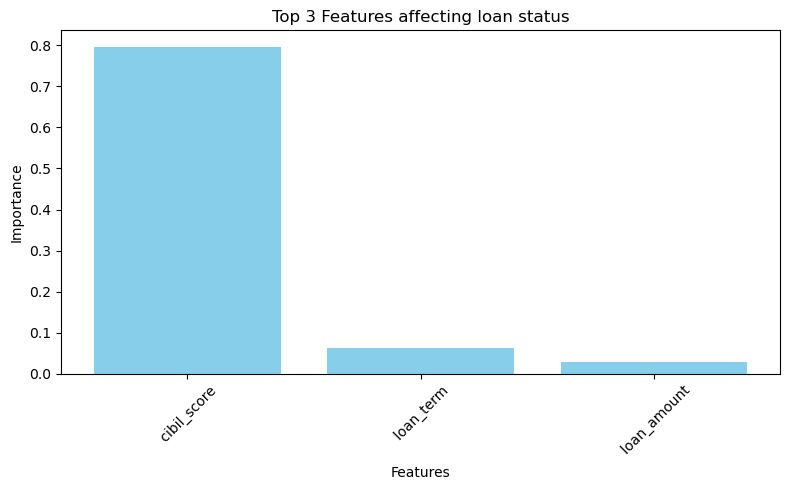

In [26]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances along with their names
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort feature importances by importance score in descending order
top_features = feature_importances_df.sort_values(by='Importance', ascending=False).head(3)

print("Top 3 Features affecting loan status:")
print(top_features)

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(range(len(top_features)), top_features['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(range(len(top_features)), top_features['Feature'], rotation=45)  # Rotate x-axis labels for better readability
plt.title('Top 3 Features affecting loan status')
plt.tight_layout()
plt.show